In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data read
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [7]:
#converting weight column into integer
df["Weight"] = df["Weight"].str.replace("kg","")

In [8]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
860,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3,45323.1648


In [9]:
df["Weight"] = df["Weight"].astype("float").astype("int32")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   int32  
 10  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


# Exploratory data analysis (EDA)

# Handling nan values

1. Complete Case Analysis: If have lessthan 5 % nan values (missing completely at random) we can remove them
2. Imputation is classified into 2 types:
   **2.1. univariate Imputation**
   **2.2. multivariate Imputation** 
3. For skewed data numerical columns go with meadian else go with mean. df[num_col].fillna(df[num_col].median(), inplace=True)
4. From **Mean/median approach**, distribution of data will change if have morethan 5% data missing-(Not good to select this approach if much distribution change happens). Outliers may come. Correlation will change. Use this only less than 5% missing values and Missing completely at random
5. **End of Distribution Imputation:** Replace nan value with outlier. This is useful when data not missing at random. **Disadvantages:** pdf distribution,variance, covariance will change
6. For handling **categorical columns** we follow 2 approahes for univariate imputation. **MODE, Random**
7. **MODE:** Missing completely at random and less than 5%. data distribution change wrt percentage of missing data.
8. **Random:** If data not MCAR and has more nan percentage like >10% then we create new category with missing data.

<5-10% -> impute simply(mean,median,mode)
10-40% -> use advanced methods(Multivate)
40%-50% - >Drop column unless it's a key column

In [11]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [12]:
df_missing_percentage = (df.isnull().mean()*100).round(2)
df_missing_percentage

Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64

In [13]:
type(df_missing_percentage)
df_missing_percentage.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
#cols more than 40% missing
cols_40 = df_missing_percentage[df_missing_percentage>40]

## Univariate Analysis

1. data distribution. if skewness is there then do transformation for linear models
2. Outliers (from boxplot)
3. Range and central tendency

### Handling Numerical columns

In [15]:
num_cols = df.select_dtypes(include="number").columns

In [16]:
num_cols

Index(['Inches', 'Weight', 'Price'], dtype='object')

In [17]:
df[num_cols].head()

,Inches,Weight,Price
0,13.3,1,71378.6832
1,13.3,1,47895.5232
2,15.6,1,30636.0000
3,15.4,1,135195.3360
4,13.3,1,96095.8080


#### Distribution plots and skew analysis

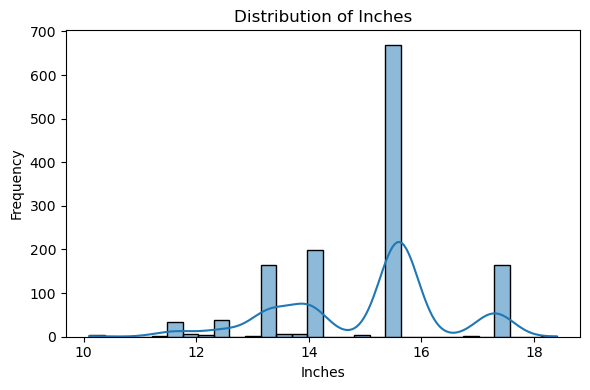

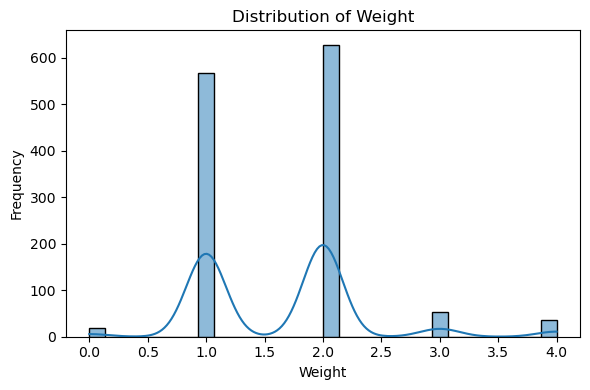

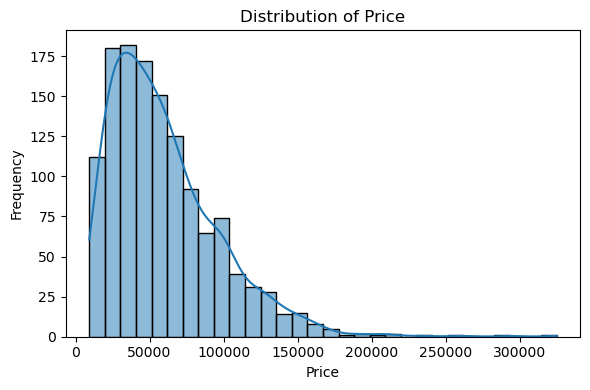

In [18]:
## Dist plot
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [19]:
## Skewnees score
df[num_cols].skew().sort_values(ascending=False)

Price     1.520866
Weight    0.886813
Inches   -0.446913
dtype: float64

#### Applying log trasformation if skew>1

In [20]:
df["Price_log"] = np.log1p(df["Price"]) 

C:\Users\Patralapati\AppData\Local\Temp\ipykernel_17084\2474287987.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price_log"])


<Axes: xlabel='Price_log', ylabel='Density'>

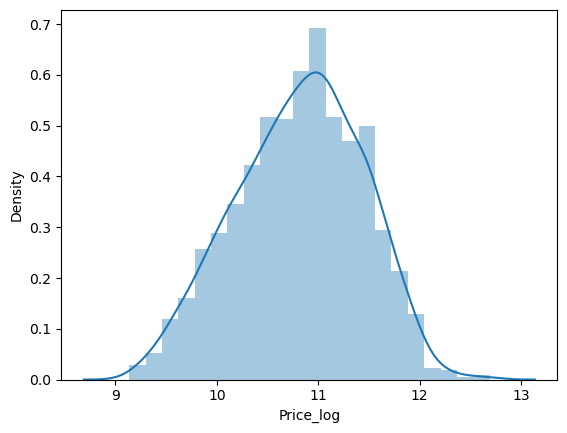

In [21]:
sns.distplot(df["Price_log"])

**points to take:** 
1. Price is right skewed to try log transform. weight is moderate right skewed and bimodel->No transformation required. inches: slight left skew. no need transformation.
2. For linear model required transformation otherwise not required.

#### Check outliers

In [22]:
num_cols

Index(['Inches', 'Weight', 'Price'], dtype='object')

In [23]:
num_cols = num_cols.append(pd.Index(["Price_log"]))

In [24]:
num_cols

Index(['Inches', 'Weight', 'Price', 'Price_log'], dtype='object')

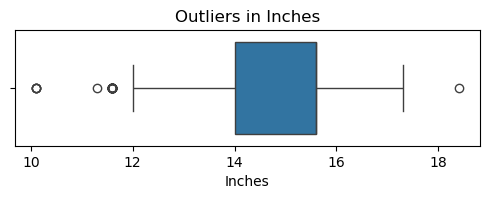

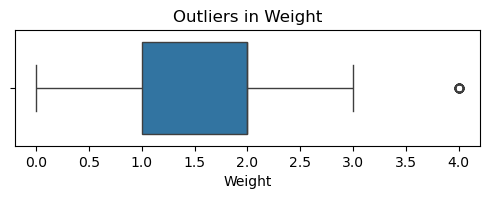

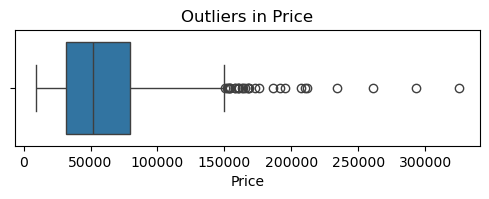

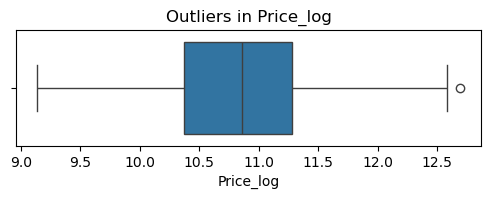

In [25]:
for col in num_cols:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

#### Range and Central Tendency

In [26]:
num_cols = num_cols.drop('Price')

In [27]:
df[num_cols].describe().T[['min','25%','50%', 'mean', '75%', 'max']]

,min,25%,50%,mean,75%,max
Inches,10.100000,14.000000,15.600000,15.017191,15.600000,18.400000
Weight,0.000000,1.000000,2.000000,1.631619,2.000000,4.000000
Price_log,9.134724,10.370854,10.860067,10.814758,11.280681,12.691444


**Points to take:**<br>
**Inches**
1. Most laptops have screens between 14 and 15.6 inches
2. mean almost equal with median means distribution is fairly symmetric.
3. very few small or large screens<br>
**Weight**
1. Some rows having zero which means data missing 
2. weight 1-2kg
3. Distribution is bimodel<br>
**Price** is okay.<br>
Now we have to investigate weights=0

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_log
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1,71378.6832,11.175769
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1,47895.5232,10.776798
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1,30636.0000,10.329964
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1,135195.3360,11.814483
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1,96095.8080,11.473111


#### Investigate on weights=0

In [29]:
df[df['Weight']==0].count

<bound method DataFrame.count of       Company            TypeName  Inches  \
14      Apple           Ultrabook    12.0   
20       Asus             Netbook    11.6   
50     Lenovo  2 in 1 Convertible    10.1   
81      Apple           Ultrabook    12.0   
146        HP           Ultrabook    12.5   
489      Asus           Ultrabook    12.5   
746   Samsung           Ultrabook    13.3   
794     Apple           Ultrabook    12.0   
812   Samsung           Ultrabook    13.3   
909        LG           Ultrabook    14.0   
990        HP             Netbook    12.5   
1069    Apple           Ultrabook    12.0   
1080   Lenovo           Ultrabook    12.5   
1082   Lenovo  2 in 1 Convertible    10.1   
1114   Lenovo  2 in 1 Convertible    10.1   
1126   Lenovo  2 in 1 Convertible    10.1   
1193    Apple           Ultrabook    12.0   
1210    Apple           Ultrabook    12.0   

                                   ScreenResolution  \
14               IPS Panel Retina Display 2304x1440   
2

In [30]:
df.duplicated().sum()

29

In [31]:
df  = df[df.duplicated()!=True]

In [32]:
df.duplicated().sum()

0

 Since it is bimodel distribution and contain invalid zero values, we should not use a simple mean/mdeian. instaed we should impute based on the pattern in the data

In [33]:
#Median based on typename
#First convert 0 values to NAN
df["Weight"] = df["Weight"].replace(0,np.nan)

In [34]:
df["Weight"].isnull().sum()

18

In [35]:
#impute by TypeName median
df["Weight"] =df.groupby("TypeName")["Weight"].transform(lambda x:x.fillna(x.median()))

In [36]:
df["Weight"].isnull().sum()

0

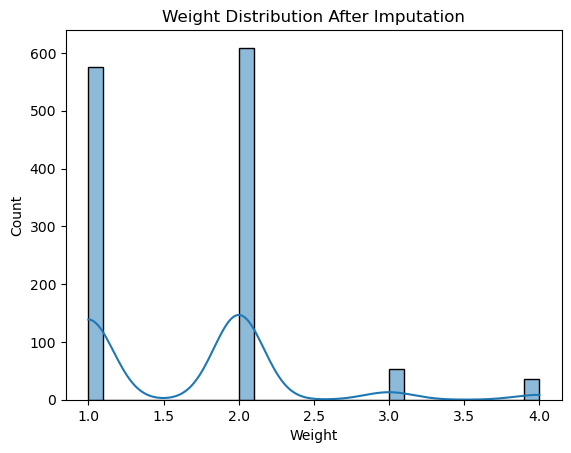

In [37]:
sns.histplot(df["Weight"],kde=True,bins=30)
plt.title("Weight Distribution After Imputation")
plt.show()

In [38]:
df["Weight"].value_counts()

Weight
2.0    609
1.0    576
3.0     54
4.0     35
Name: count, dtype: int64

In [39]:
#Convert Ram column to int
df["Ram"] = df["Ram"].str.replace("GB","")
df["Ram"] = df["Ram"].astype("int32")

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_log
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,11.175769
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,10.776798
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,10.329964
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,11.814483
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,11.473111


Ram skew value: 2.6985395516946475


C:\Users\Patralapati\AppData\Local\Temp\ipykernel_17084\2310083955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Ram"])


<Axes: xlabel='Ram', ylabel='Density'>

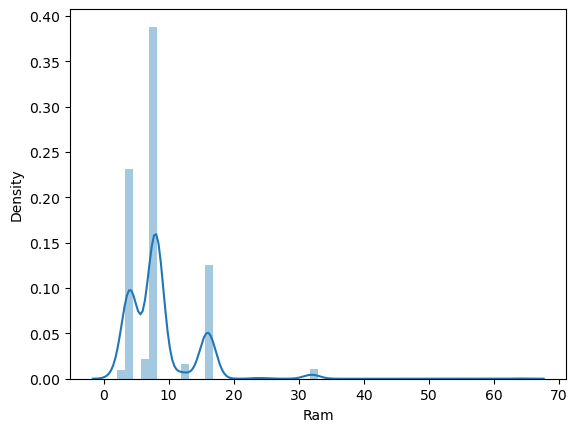

In [41]:
print("Ram skew value:",df["Ram"].skew())
sns.distplot(df["Ram"])

Numeric discrete : dont transform when u use tree model. if not use transform

In [42]:
df["Ram"].describe()

count    1274.000000
mean        8.444270
std         5.098291
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

In [43]:
df.select_dtypes(include="number").corr()["Price_log"]

Inches       0.039392
Ram          0.680627
Weight       0.122967
Price        0.928243
Price_log    1.000000
Name: Price_log, dtype: float64

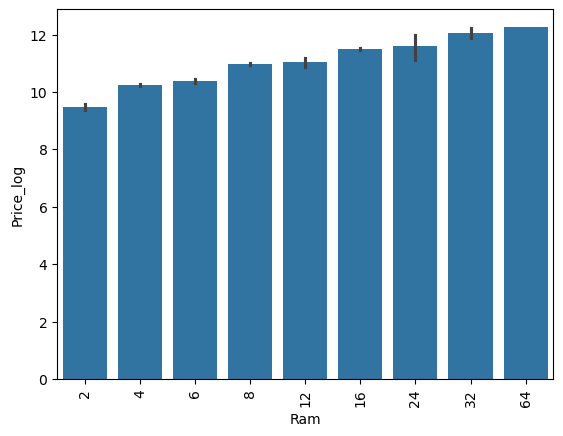

In [44]:
sns.barplot(x=df['Ram'],y=df['Price_log'])
plt.xticks(rotation='vertical')
plt.show()

### Categorical columns analysis

1. If a column has too many unique values, consider grouping or encoding 

In [45]:
cat_cols = df.select_dtypes(include="object").columns

In [46]:
#check unique value counts in each column
for col in cat_cols:
    print(f"{col}:{df[col].nunique()} unique values")

Company:19 unique values
TypeName:6 unique values
ScreenResolution:40 unique values
Cpu:118 unique values
Memory:39 unique values
Gpu:110 unique values
OpSys:9 unique values


In [47]:
#View category counts(Frequency) in each column
for col in cat_cols:
    print(f"{col} Value counts:\n {df[col].value_counts(dropna=False)}")

Company Value counts:
 Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
TypeName Value counts:
 TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64
ScreenResolution Value counts:
 ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                  

In [48]:
df["Company"].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

Points to take:
1. we can group rare brands into **others** category
2. If any brand with low count has a significant impact on pricing due to its premium or budget brand/different configs. it represents an edge case.
3. Group as **others** but analyze impact
4. Before grouping, analyze mean/median price by brand.

In [49]:
df.groupby("Company")['Price_log'].mean().sort_values()

Company
Vero          9.351253
Mediacom      9.645588
Chuwi         9.684056
Acer         10.301858
Fujitsu      10.563617
Lenovo       10.779110
Asus         10.797099
HP           10.805153
Dell         10.924500
Xiaomi       10.995987
Toshiba      11.044686
Samsung      11.095139
Huawei       11.235410
Apple        11.274659
Microsoft    11.305022
Google       11.374993
MSI          11.383352
LG           11.621746
Razer        11.940535
Name: Price_log, dtype: float64

In [50]:
# Group rare brands into others <10
company_counts = df["Company"].value_counts()
rare_companies_count = company_counts[company_counts<10].index
df["Company"] = df["Company"].apply(lambda x: 'Other' if x in rare_companies_count else x)

In [51]:
df["Company"].value_counts()

Company
Dell       291
Lenovo     289
HP         268
Asus       151
Acer       101
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

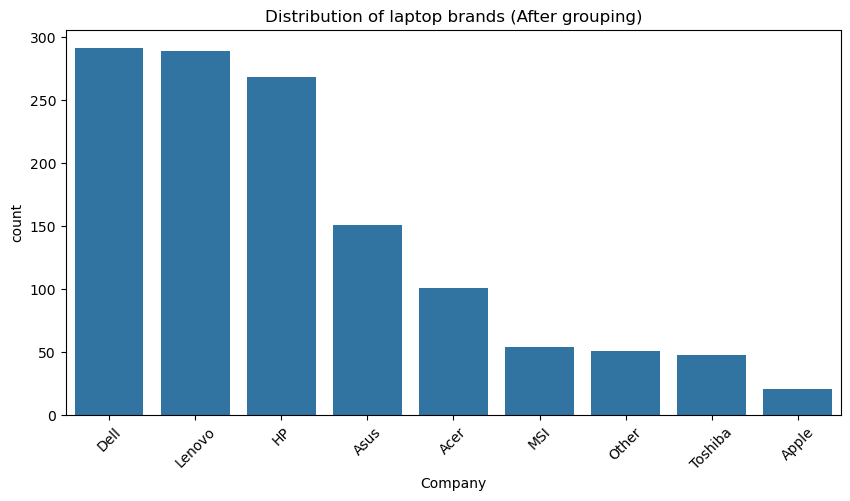

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Company"],order=df["Company"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of laptop brands (After grouping)")
plt.show()

In [54]:
#Company column encoding
# df = pd.get_dummies(df,columns=["Company"],drop_first=True)

In [53]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_log
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,11.175769
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,10.776798
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,10.329964
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,11.814483
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,11.473111


#### Handling TypeName column

In [54]:
df["TypeName"].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

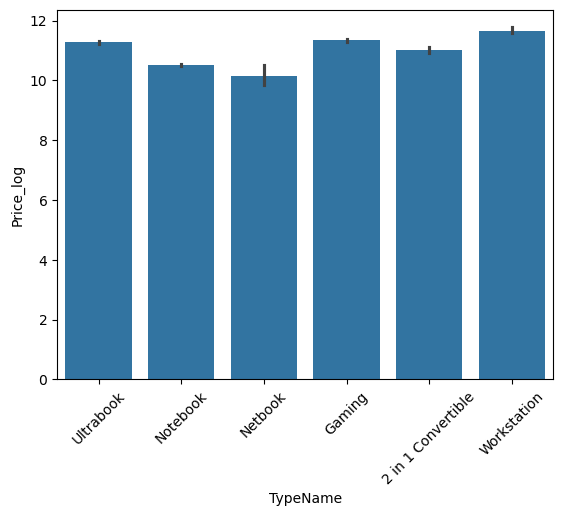

In [55]:
#average price for each typename
sns.barplot(x=df['TypeName'],y=df['Price_log'])
plt.xticks(rotation=45)

In [56]:
#Company column encoding
# df = pd.get_dummies(df,columns=["TypeName"],drop_first=True)

In [57]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_log
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.0,68198.4,11.130191


In [58]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Price_log'],
      dtype='object')

#### ScreenResolution column

In [59]:
df["ScreenResolution"].head()

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
Name: ScreenResolution, dtype: object

In [60]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

<Axes: xlabel='Touchscreen'>

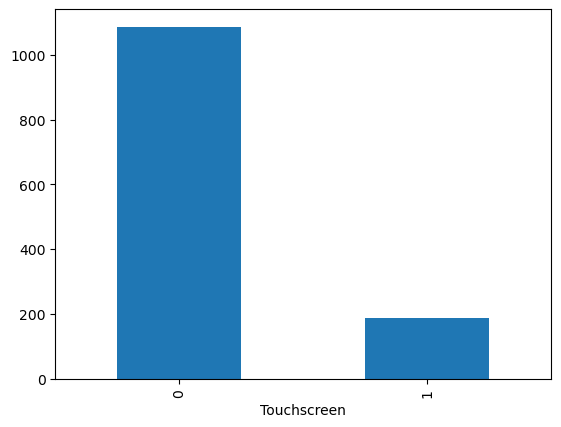

In [61]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price_log'>

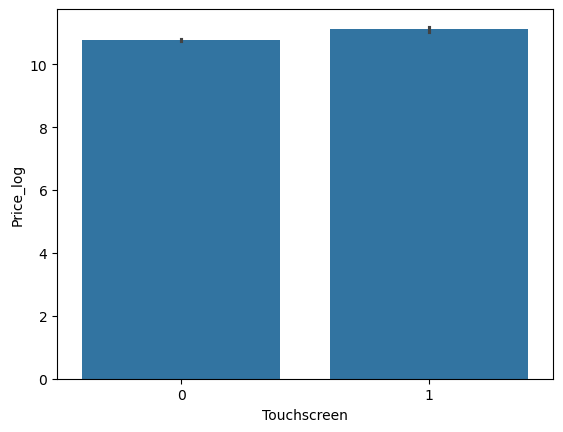

In [62]:
sns.barplot(x=df['Touchscreen'],y=df['Price_log'])

In [63]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Ips'>

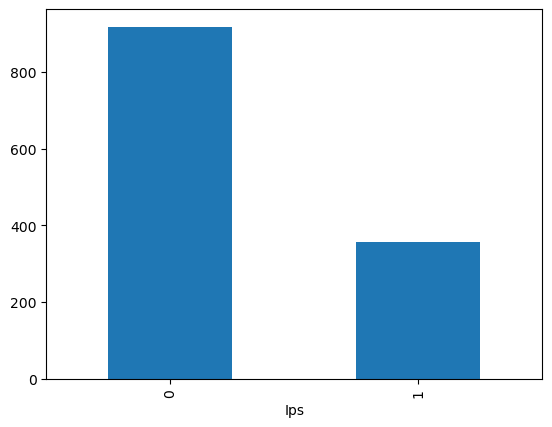

In [64]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price_log'>

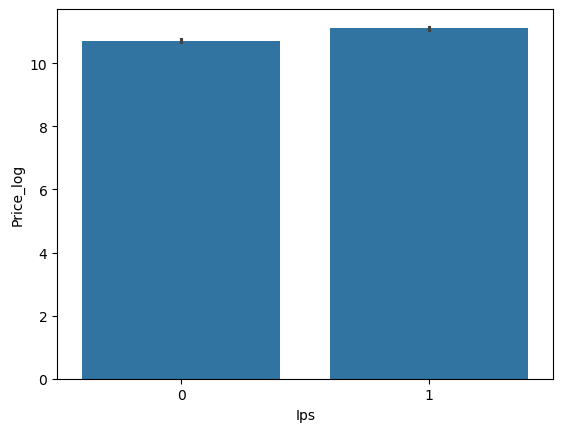

In [65]:
sns.barplot(x=df['Ips'],y=df['Price_log'])

In [66]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1269,1366,768
1270,IPS Panel Full HD / Touchscreen 1920,1080
1271,IPS Panel Quad HD+ / Touchscreen 3200,1800
1272,1366,768


In [67]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [68]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [69]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [70]:
df.select_dtypes(include="number").corr()["Price_log"]

Inches         0.039392
Ram            0.680627
Weight         0.122967
Price          0.928243
Price_log      1.000000
Touchscreen    0.192719
Ips            0.278185
X_res          0.546191
Y_res          0.543212
Name: Price_log, dtype: float64

In [71]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [72]:
df.select_dtypes(include="number").corr()["Price_log"]

Inches         0.039392
Ram            0.680627
Weight         0.122967
Price          0.928243
Price_log      1.000000
Touchscreen    0.192719
Ips            0.278185
X_res          0.546191
Y_res          0.543212
ppi            0.478906
Name: Price_log, dtype: float64

In [73]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [74]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [75]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_log,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,11.175769,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,10.776798,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,10.329964,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,11.814483,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,11.473111,0,1,226.983005


#### CPU column

In [76]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [77]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [78]:
df['Cpu Name'].sample()

549    Intel Core i7
Name: Cpu Name, dtype: object

In [79]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [80]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<Axes: xlabel='Cpu brand'>

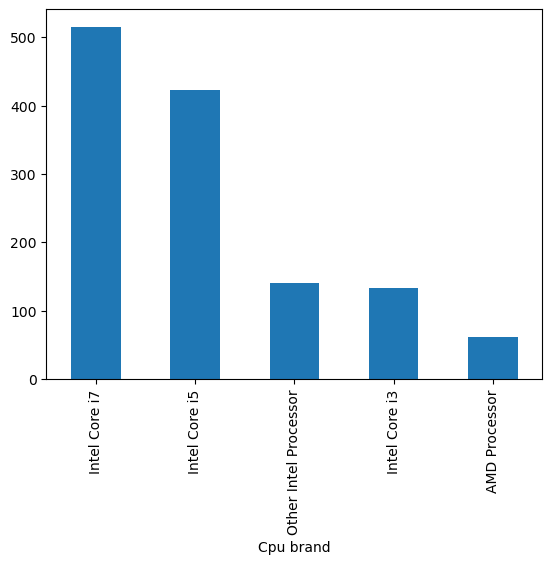

In [81]:
df['Cpu brand'].value_counts().plot(kind='bar')

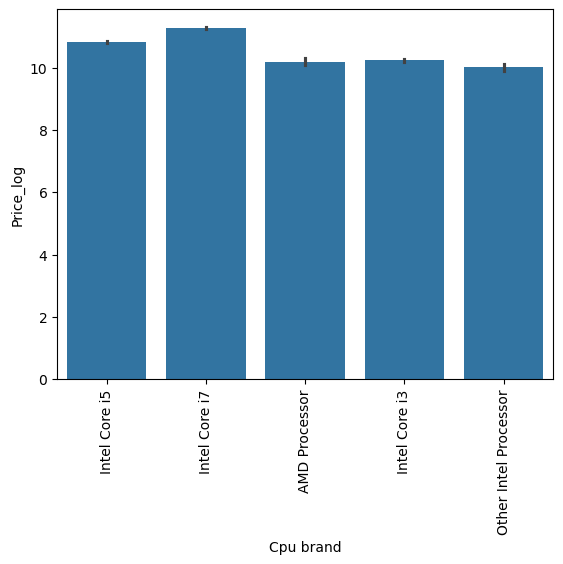

In [82]:
sns.barplot(x=df['Cpu brand'],y=df['Price_log'])
plt.xticks(rotation='vertical')
plt.show()

In [83]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [84]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [85]:
df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Patralapati\AppData\Local\Temp\ipykernel_17084\2297385766.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '', regex=True)


In [86]:
df['Memory'].head()

0              128 SSD
1    128 Flash Storage
2              256 SSD
3              512 SSD
4              256 SSD
Name: Memory, dtype: object

In [87]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [88]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


In [89]:
import pandas as pd

# 1. Normalize Memory values
df['Memory'] = (
    df['Memory']
    .astype(str)
    .str.replace(r'\.0$', '', regex=True)   # remove trailing .0
    .str.replace('GB', '', regex=False)     # drop GB suffix
    .str.replace('TB', '000', regex=False)  # convert TB to GB (1TB = 1000GB)
)

# 2. Split into first + second layers
new = df['Memory'].str.split("+", n=1, expand=True)
df['first'] = new[0].str.strip()
df['second'] = new[1].str.strip().fillna('0')

# 3. Detect storage type in each part
for i in (1, 2):
    part = 'first' if i == 1 else 'second'
    df[f'Layer{i}HDD'] = df[part].str.contains('HDD', regex=False).astype(int)
    df[f'Layer{i}SSD'] = df[part].str.contains('SSD', regex=False).astype(int)
    df[f'Layer{i}Hybrid'] = df[part].str.contains('Hybrid', regex=False).astype(int)
    df[f'Layer{i}Flash_Storage'] = df[part].str.contains('Flash Storage', regex=False).astype(int)

# 4. Keep digits only
df['first'] = df['first'].str.replace(r'\D+', '', regex=True)
df['second'] = df['second'].str.replace(r'\D+', '', regex=True)

# 5. Safely convert to numeric: strip → to_numeric → fill NaN → int
for col in ['first', 'second']:
    df[col] = (
        pd.to_numeric(df[col], errors='coerce')  # non-numeric → NaN
        .fillna(0).astype(int)                   # fill and cast to int
    )

# 6. Compute total storage by type
df['HDD'] = df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD']
df['SSD'] = df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD']
df['Hybrid'] = df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid']
df['Flash_Storage'] = df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage']

# 7. Remove intermediate columns
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)



In [90]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Price_log,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
912,Lenovo,Notebook,6,256 SSD,Nvidia GeForce 940MX,Windows 10,2.0,42037.92,10.646351,0,0,141.211998,Intel Core i7,0,256,0,0
696,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 620,Windows 10,1.0,93186.72,11.442371,1,0,157.350512,Intel Core i7,0,512,0,0
819,Dell,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.0,40226.40,10.602304,0,0,111.935204,Intel Core i5,500,0,0,0
181,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.0,74538.72,11.219087,0,0,165.632118,Intel Core i5,0,256,0,0
874,Other,Ultrabook,16,256 SSD,Nvidia GeForce 940MX,Windows 10,1.0,98514.72,11.497971,0,0,146.860478,Intel Core i7,0,256,0,0


In [91]:
df.drop(columns=['Memory','Price'],inplace=True)

In [92]:
df.select_dtypes(include="number").corr()["Price_log"]

Ram              0.680627
Weight           0.122967
Price_log        1.000000
Touchscreen      0.192719
Ips              0.278185
ppi              0.478906
HDD             -0.096959
SSD              0.658921
Hybrid           0.022565
Flash_Storage   -0.051236
Name: Price_log, dtype: float64

In [93]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [94]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [95]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [96]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [97]:
df = df[df['Gpu brand'] != 'ARM']

In [98]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

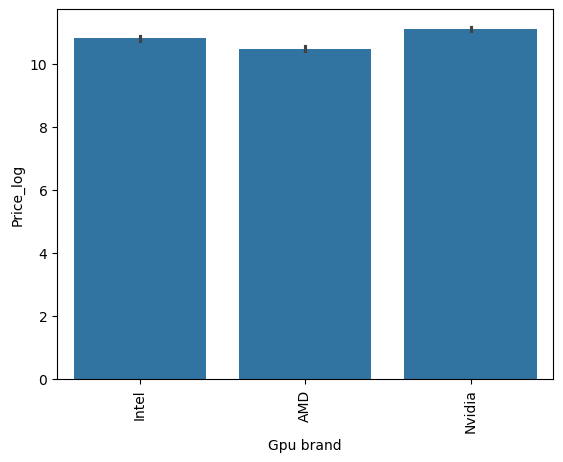

In [99]:
sns.barplot(x=df['Gpu brand'],y=df['Price_log'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [100]:
df.drop(columns=['Gpu'],inplace=True)

In [101]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

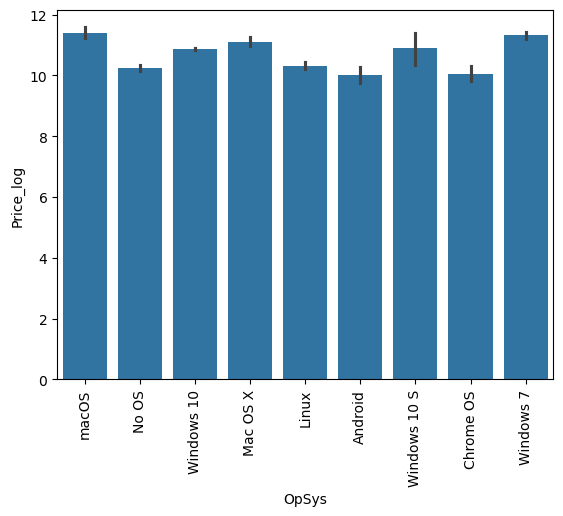

In [102]:
sns.barplot(x=df['OpSys'],y=df['Price_log'])
plt.xticks(rotation='vertical')
plt.show()

In [103]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [104]:
df['os'] = df['OpSys'].apply(cat_os)

In [105]:
df.drop(columns=['OpSys'],inplace=True)

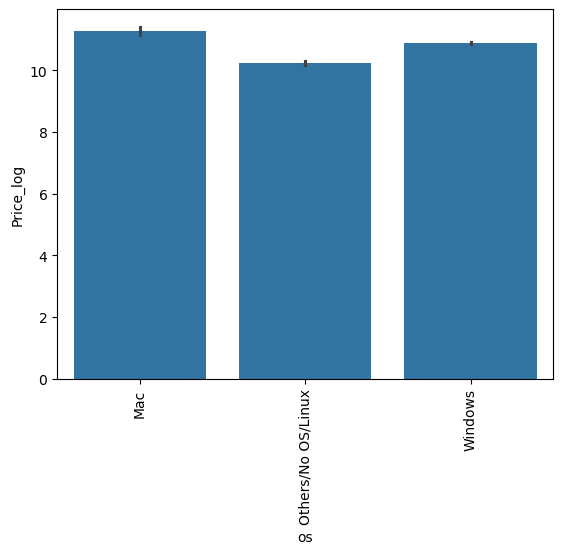

In [106]:
sns.barplot(x=df['os'],y=df['Price_log'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Patralapati\AppData\Local\Temp\ipykernel_17084\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

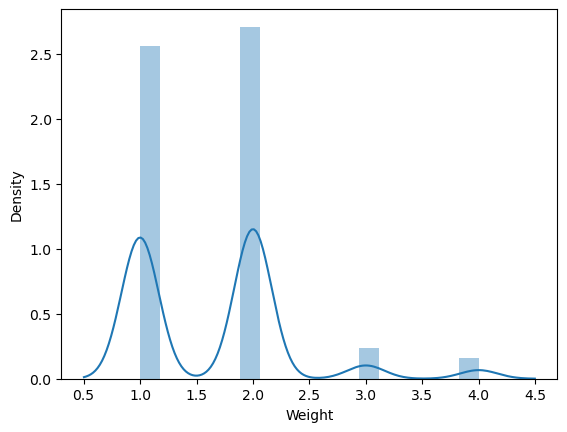

In [107]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_log'>

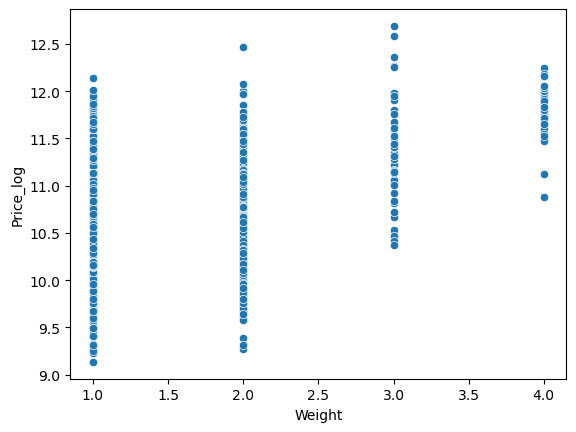

In [108]:
sns.scatterplot(x=df['Weight'],y=df['Price_log'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int32  
 3   Weight       1273 non-null   float64
 4   Price_log    1273 non-null   float64
 5   Touchscreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   ppi          1273 non-null   float64
 8   Cpu brand    1273 non-null   object 
 9   HDD          1273 non-null   int32  
 10  SSD          1273 non-null   int32  
 11  Gpu brand    1273 non-null   object 
 12  os           1273 non-null   object 
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 124.3+ KB


In [110]:
df.select_dtypes(include="number").corr()["Price_log"]

Ram            0.680521
Weight         0.122597
Price_log      1.000000
Touchscreen    0.194290
Ips            0.279240
ppi            0.480688
HDD           -0.097362
SSD            0.658809
Name: Price_log, dtype: float64

In [111]:
df.head()

,Company,TypeName,Ram,Weight,Price_log,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.0,11.175769,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.0,10.776798,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.0,10.329964,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.0,11.814483,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.0,11.473111,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


### Splitting data

In [112]:
X = df.drop(columns=['Price_log'])
y = df['Price_log']

In [113]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.0,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.0,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.0,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2,1.0,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [114]:
y

0       11.175769
1       10.776798
2       10.329964
3       11.814483
4       11.473111
          ...    
1269    10.555283
1270    10.433929
1271    11.288127
1272     9.409365
1273    10.614153
Name: Price_log, Length: 1273, dtype: float64

The stratify parameter ensures that the distribution of the target variable (y) in the train and test sets is proportional to the original distribution in the dataset. In other words, it ensures that both the training and testing sets have similar proportions of each class (or category) in a classification problem.

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
490,Lenovo,Notebook,8,2.0,0,1,141.211998,Intel Core i5,0,256,Nvidia,Windows
405,Asus,Ultrabook,8,1.0,0,0,157.350512,Intel Core i7,0,512,Intel,Windows
156,Lenovo,2 in 1 Convertible,4,1.0,1,1,157.350512,Intel Core i3,0,256,Intel,Windows
650,Asus,Gaming,32,3.0,0,1,127.335675,Intel Core i7,0,512,Nvidia,Windows
770,Dell,Notebook,16,2.0,0,0,141.211998,Intel Core i7,0,256,AMD,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,HP,Notebook,4,1.0,0,0,157.350512,Intel Core i5,500,0,Intel,Windows
1095,Acer,Notebook,8,2.0,0,0,141.211998,Intel Core i5,1000,256,Nvidia,Windows
1130,HP,Notebook,8,2.0,0,0,100.454670,Intel Core i7,2000,0,Intel,Windows
860,Lenovo,Notebook,8,2.0,0,1,141.211998,Intel Core i5,1000,0,Intel,Windows


## Model Building

In [122]:
# pip install xgboost

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [123]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [127]:
print(X_train.columns,"type:",X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 490 to 1126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1018 non-null   object 
 1   TypeName     1018 non-null   object 
 2   Ram          1018 non-null   int32  
 3   Weight       1018 non-null   float64
 4   Touchscreen  1018 non-null   int64  
 5   Ips          1018 non-null   int64  
 6   ppi          1018 non-null   float64
 7   Cpu brand    1018 non-null   object 
 8   HDD          1018 non-null   int32  
 9   SSD          1018 non-null   int32  
 10  Gpu brand    1018 non-null   object 
 11  os           1018 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 91.5+ KB
Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips', 'ppi',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object') type: None


In [129]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8258622221801428
MAE 0.21101621353344308


### Ridge Regression

In [130]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8202268890496213
MAE 0.21319240131688091


### Lasso Regression

In [131]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8238353661169717
MAE 0.2114888448418481


### KNN

In [132]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7803492120377036
MAE 0.2240337580376733


C:\Users\Patralapati\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Patralapati\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Patralapati\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Patralapati\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Patralapati\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht

### Decision Tree

In [133]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.821378292180261
MAE 0.20570561790535805


### SVM

In [134]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8499244577032876
MAE 0.18631031196467224


### Random Forest

In [135]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8624947393137865
MAE 0.17864870425634444


### Extra trees

In [137]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              bootstrap=True,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.854914959376437
MAE 0.18273876476561585


### Ada Boost

In [138]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.795440910009555
MAE 0.23295595306908157


### Gradient Boost

In [139]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8727770083733442
MAE 0.17227866780857912


### XGboost

In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8766890943470316
MAE 0.16984091350051603


### Voting Regressor

In [145]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8691746381226603
MAE 0.17490317342746925


### Stacking

In [146]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8639623123486693
MAE 0.1818520167498856


## Exporting the Model

In [147]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))